In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.isdir("models"):
	os.mkdir("models")

print(tf.__version__)

2.17.0


In [2]:
def get_three_classes(x,y):
	indices_0, _ = np.where(y == 0.)
	indices_1, _ = np.where(y == 1.)
	indices_2, _ = np.where(y == 2.)

	indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)

	x = x[indices]
	y = y[indices]

	counts = x.shape[0]
	indices = np.random.choice(range(counts), counts, replace=False)
	x = x[indices]
	y = y[indices]

	y = tf.keras.utils.to_categorical(y)

	return x, y, counts

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, y_train, train_counts = get_three_classes(x_train, y_train)
x_test, y_test, test_counts = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


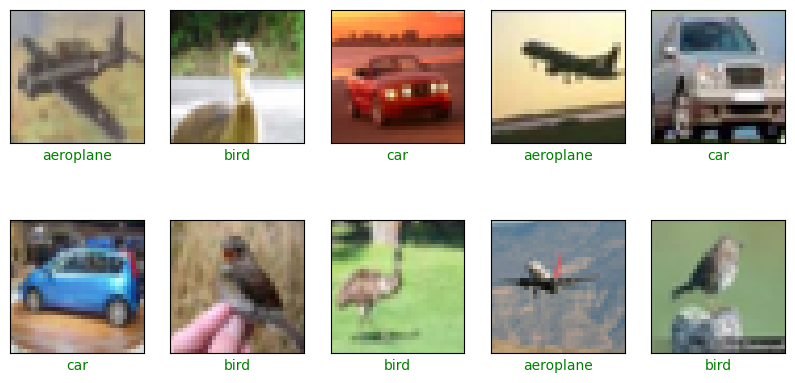

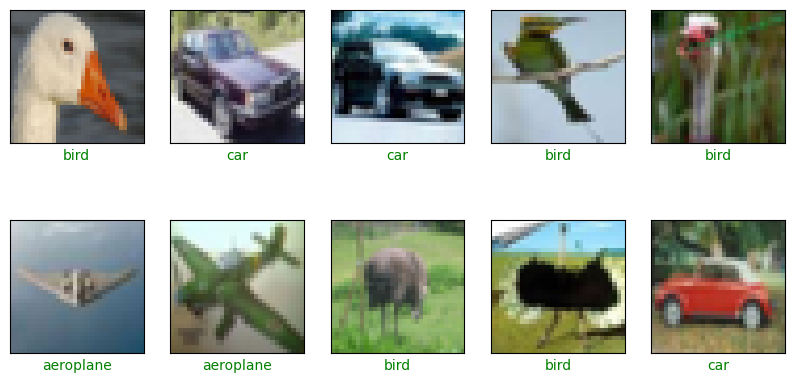

In [3]:
class_names = ["aeroplane","car","bird"]

def show_random_example(x,y,p):
    indices = np.random.choice(range(x.shape[0]),10,replace=False)
    x = x[indices]
    y = y[indices]
    p = p[indices]

    plt.figure(figsize=(10,5))

    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])

        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)

    plt.show()

show_random_example(x_train, y_train, y_train)
show_random_example(x_test, y_test, y_test)

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
	def add_conv_block(model, num_filters):
		model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
		model.add(BatchNormalization())
		model.add(Conv2D(num_filters, 3, activation='relu'))
		model.add(MaxPooling2D(pool_size=2))
		model.add(Dropout(0.5))
		return model
	model = tf.keras.models.Sequential()
	model.add(Input(shape=(32,32,3)))
	model = add_conv_block(model, 32)
	model = add_conv_block(model, 64)
	model = add_conv_block(model, 128)

	model.add(Flatten())
	model.add(Dense(3, activation='softmax'))

	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = create_model()

In [7]:
h = model.fit(
    x_train / 255., y_train,
    validation_data=(x_test / 255., y_test),
    epochs=10, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.keras', 
                                            save_best_only=True, 
                                            save_weights_only=False, 
                                            monitor='val_accuracy')
    ]
)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 28s 176ms/step - accuracy: 0.5896 - loss: 1.2274 - val_accuracy: 0.3333 - val_loss: 2.9947
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.7702 - loss: 0.5696 - val_accuracy: 0.3333 - val_loss: 3.2787
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.8034 - loss: 0.4978 - val_accuracy: 0.4567 - val_loss: 2.1019
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.8216 - loss: 0.4477 - val_accuracy: 0.3910 - val_loss: 2.0771
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.8358 - loss: 0.4183 - val_accuracy: 0.6890 - val_loss: 0.9337
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.8522 - loss: 0.3890 - val_accuracy: 0.6260 - val_loss: 1.2496
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.8640 - loss: 0.3532 - val_accuracy: 0.8033 - val_loss: 0.5294
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.8666 - loss: 0

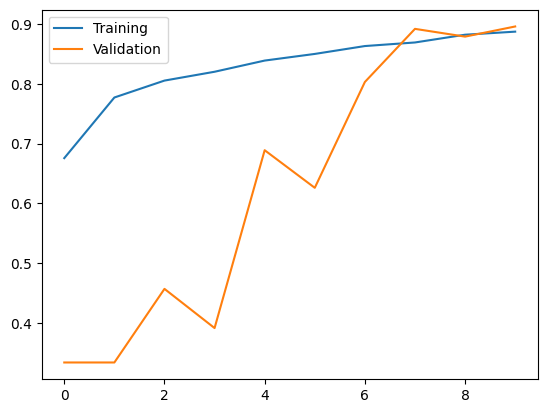

In [8]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(val_accs)), val_accs, label='Validation')
plt.legend()
plt.show()

In [9]:
model = tf.keras.models.load_model('models/model_0.896.keras')

In [10]:
pred = model.predict(x_test / 255.)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


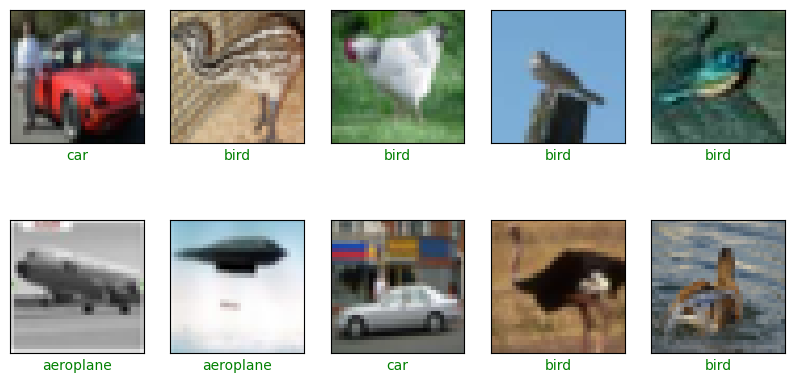

In [11]:
show_random_example(x_test, y_test, pred)

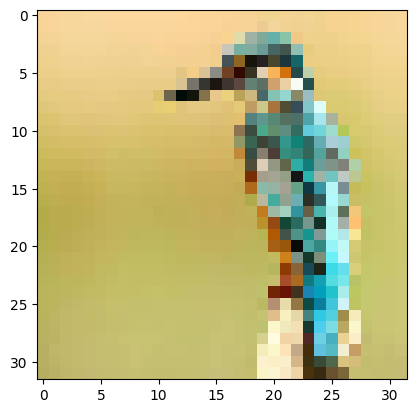

In [13]:
#make a code that i will give an image and it will predict the class of the image
import cv2
img = cv2.imread("bird.jpeg")
img = cv2.resize(img, (32,32))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [14]:
p = model.predict(np.expand_dims(img, axis=0) / 255.)
print(class_names[np.argmax(p[0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
bird
